<a href="https://colab.research.google.com/github/EJVergz/58015-NumericalMethod/blob/main/58015_Code_Activity_Numerical_Integration_Nana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Code Activity: Numerical Integration**
*© A.D Buenaventura, M.A Catinoy & E.J Vergara*

In [56]:
import numpy as np
from sympy import *
from scipy import random
import scipy.integrate as integrate
import matplotlib.pyplot as plt

#**1.**

In [38]:
integrate

<module 'scipy.integrate' from '/usr/local/lib/python3.7/dist-packages/scipy/integrate/__init__.py'>

[[1]](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.htmlhttps://) help(integrate)

Methods for Integrating Functions given function object.

   quad          -- General purpose integration.

   dblquad       -- General purpose double integration.

   tplquad       -- General purpose triple integration.

   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n.

   quadrature    -- Integrate with given tolerance using Gaussian quadrature.

   romberg       -- Integrate func using Romberg integration.
#Methods for Integrating Functions given fixed samples.

   trapezoid            -- Use trapezoidal rule to compute integral.

   cumulative_trapezoid -- Use trapezoidal rule to cumulatively compute integral.

   simps                -- Use Simpson's rule to compute integral from samples.

   romb                 -- Use Romberg Integration to compute integral from
                        -- (2**k + 1) evenly-spaced samples.

   See the special module's orthogonal polynomials (special) for Gaussian
      quadrature roots and weights for other weighting factors and regions.

 Interface to numerical integrators of ODE systems.

   odeint        -- General integration of ordinary differential equations.

   ode           -- Integrate ODE using VODE and ZVODE routines.

General integration (quad)
The scipy function quad is provided to integrate a function of one variable between two points. The points can be $\pm\infty$ ($\pm$ np.infty) to indicate infinite limits. For example, suppose you wish to integrate the following:

$$
I = \int_0^{2\pi} e^{-x}\sin(x)dx
$$
This could be computed using quad as:

In [40]:
fun = lambda x : np.exp(-x)*np.sin(x) 

result,error = integrate.quad(fun, 0, 2*np.pi) 

print(result,error)

0.49906627863414593 6.023731631928322e-15


The first argument to quad is a “callable” Python object (i.e a function, method, or class instance). Notice that we used a lambda function in this case as the argument. The next two arguments are the limits of integration. The return value is a tuple, with the first element holding the estimated value of the integral and the second element holding an upper bound on the error.

The analytic solution to the integral is

$$
\int_0^{2\pi} e^{-x} \sin(x) dx = \frac{1}{2} -  e^{-2\pi} \simeq \textrm{0.499066}
$$
so that is pretty good.

Here it is again, integrated from 0 to infinity:

In [41]:
I = integrate.quad(fun, 0, np.infty)

print(I)

(0.5000000000000002, 1.4875911973447031e-08)


In this case the analytic solution is exactly 1/2, so again pretty good.

We can calculate the error in the result by looking at the difference between the exact result and the numerical value from quad with

In [42]:
print(abs(I[0]-0.5))

2.220446049250313e-16


In this case, the numerically-computed integral is within $10^{-16}$ of the exact result — well below the reported error bound.

**Double integrals using dblquad**

Suppose we want to integrate $f(x,y)=y\sin(x)+x\cos(y)$ over $\pi \le x \le 2\pi$ and $0 \le y \le \pi$:

$$\int_{x=\pi}^{2\pi}\int_{y=0}^{\pi} y \sin(x) + x \cos(y) dxdy$$
To use dblquad we have to provide callable functions for the range of the x-variable. Although here they are constants, the use of functions for the limits enables freedom to integrate over non-constant limits. In this case we create trivial lambda functions that return the constants. Note the order of the arguments in the integrand. If you put them in the wrong order you will get the wrong answer.

In [43]:
from scipy.integrate import dblquad

integrand = lambda x,y: y * np.sin(x) + x * np.cos(y)

ymin = 0
ymax = np.pi

xmin = lambda y : np.pi
xmax = lambda y : 2*np.pi

I, err = dblquad(integrand, ymin, ymax, xmin, xmax)
print(I, err)

-9.869604401089354 3.8998131697641544e-13


**Triple integrals using tplquad**

We can also numerically evaluate a triple integral:

$$ \int_{x=0}^{\pi}\int_{y=0}^{1}\int_{z=-1}^{1} y\sin(x)+z\cos(x) dxdydz$$

In [45]:
from scipy.integrate import tplquad

integrand = lambda x,y,z: y * np.sin(x) + z * np.cos(x)

zmin = -1
zmax = 1

ymin = lambda z: 0
ymax = lambda z: 1

xmin = lambda y,z: 0
xmax = lambda y,z: np.pi

I, err = tplquad(integrand, zmin, zmax, ymin, ymax, xmin, xmax)
print(I, err)

1.9999999999999998 3.1353718221552614e-14


#**2.**

In [ ]:
def f(x):
	f = lambda x: (4*x - 3)**3
	return f 

def integral(a, b):
	return (1/16)*((4*b-3)**4-(4*a-3)**4)

def dx(w, x):
	if(w==1):
		return 12*(4*x-3)
	if(w==2):
		return 96*(4*x-3)
	if(w==3):
		return 384
	if(w==4):
		return 0

def trapz_rule(f, a, b, n):
	h = (b-a)/n
	area = (f(a) + f(b))/2
	for i in range(1, n):
		x = a + i*h;
		area = area + f(x)
	area = area*h

	return area

print("Using the Trapezoidal Rule")
print("")

for i in range(1, 50, 5):
	a = trapz_rule(f("x"), -3, 5, i)
	e = abs((integral(-3, 5) - a)/integral(-3, 5))*100    
	a = round(a, 4)
	e = round(e, 4)
	print("Approximation = ", a, "Error = ", e, "%")

print("")
print("Using the 1/3 Simpsons Rule")

print("")

def simp13(f, a, b, n):
    approx = []
    if a > b:
        print("Incorrect bounds")
    if n%2:
        print("Error: n must be even")
    else:
        h = (b-a)/n
        s = f(a) + f(b)
        for i in range(1, n, 2):
            s += 4*f(a + i*h)
            k = (s*h)/3
        for j in range(2, n-1, 2):
            s += 2*f(a + i*h)
            k = (s*h)/3
        approx = (s*h)/3
    return approx

r = simp13(f("x"), -3, 5, 2)

err = abs((integral(-3, 5)-r)/r)*100
print("For n = ", 2, "the approximation is: ", simp13(f("x"), -3, 5, 2), "the error is: ", err, "%")

In the codes above, this verifies that it is exact for polynomials of degree 3 or less if you are using Simpson’s 1/3 method. As shown in the dx function, the solution of the 4th derivative of f(x) is equal to zero. It is always true with the polynomial of degree 3 or less. Because lower order derivatives have a non-zero value, we can't use them in the error calculation.

In [87]:
f = lambda x: np.cos(2*x)-np.sin(2*x)
a, b = 0,10
n = 1e4
trigo_tans1 = trapz_rule(f, a,b,n)
trigo_terr1 = (abs(asol-trigo_tans1)/asol)*100

In [88]:
print('Trapezoid Trigo Func: {} Error: {}'.format(trig_tans1,trig_terr1))

Trapezoid Trigo Func: 0.16051360276595403 Error: 99.9998629611519


In [90]:
f = lambda x: np.log(x**2+3)
a, b = 0,10
n = 1e4
log_tans1 = trapz_rule(f, a,b,n)
log_terr1 = (abs(asol-log_tans1)/asol)*100

In [91]:
print('Trapezoid Log Func: {} Error: {}'.format(log_tans1,log_terr1))

Trapezoid Log Func: 31.194582252758618 Error: 99.97336755549154


In [94]:
def simp_13(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(4*func(lb+h*np.arange(1,divs,2)))+ \
            np.sum(2*func(lb+h*np.arange(2,divs,2)))
  S = (h/3)*A
  return S

In [93]:
f = lambda x : np.cos(3*x)-np.sin(3*x)
a, b = 0,10
n = 1e4
trig13_sans1 = simp_13(f, a,b,n)
trig13_serr1 = (abs(asol-trig13_sans1)/asol)*100

In [ ]:
print('Simpson 1/3: {} Error: {}'.format(trig13_sans1,trig13_serr1))

In [74]:
f = lambda x : np.log(x**2+3)
a, b = 0,10
n = 1e4
log13_sans1 = simp_13(f, a,b,n)
log13_serr1 = (abs(asol-log13_sans1)/asol)*100

In [76]:
print('Simpson 1/3:{} Error:{}'.format(log13_sans1,log13_serr1))

Simpson 1/3:31.194582236577386 Error:99.97336755550535


In [28]:
def simp_38(f, a, b, n):
	h = (b-a)/n
	s5 = f(a) + f(b)
	for i in range(n):
		if(n%3 == 0):
			s5 = s5 + 2*f(a + i*h)
		else:
			s5 = s5 + 3*f(a + i*h)			
	s = ((3*h)/8)*s5 
	return s


In [ ]:
print("Composite 3/8 Simpsons Rule")
print("")

for i in range(1, 100, 3):
	s38 = simp_38(f("x"), -3, 5, i)
	e38 = abs((integral(-3, 5) - s38)/integral(-3, 5))*100    
	s38 = round(s38, 4)
	e38 = round(e38, 4)
	print("Approximation = ", s38, "Error = ", e38, "%")
    
print("")

print("Approximation at n = 200: ", simp_38(f("x"), -3, 5, 200))
print("Error: ", abs((integral(-3, 5) - simp_38(f("x"), -3, 5, 200))/integral(-3, 5))*100, "%")

print("")
print("If n is increase to 200")

for i in range(1, 200, 3):
    ss38 = simp_38(f("x"), -3, 5, i)
    err6 = abs((integral(-3, 5) - ss38)/integral(-3, 5))*100
    if(err6 <= 0.005):
        print("Approximation = ", ss38, "Error = ", err6, "%")
    
print("")

In [77]:
def simp_38(func,lb,ub,divs):
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

In [96]:
f = lambda x : np.sin(3*x)-np.cos(3*x)
a, b = 0,10
n = 1e4
trig38_sans1 = simp_38(f, a,b,n)
tri38_serr1 = (abs(asol-trig38_sans1)/asol)*100

In [97]:
print('Simpson 3/8: {} Error: {}'.format(trig38_sans1,tri38_serr1))

Simpson 3/8: 0.6115453163836838 Error: 99.9994778918156


In [79]:
f = lambda x : np.log(x**2+3)
a, b = 0,10
n = 1e4
log38_sans1 = simp_38(f, a,b,n)
log38_serr1 = (abs(asol-log38_sans1)/asol)*100

In [81]:
print('Simpson 3/8: {} Error: {}'.format(log38_sans1,tri38_serr1))

Simpson 3/8: 31.19342357860179 Error: 99.9994778918156


When we increase n to 200, something odd happens.
The error starts to rise, meaning that there is an ideal value for n.
We can set conditions and a tolerance value to boost our performance.
As can be shown, constraining our algorithm within a tolerance level significantly improved our result.

In [34]:
a = 0
b = np.pi 
N = 1000

ar = np.zeros(N)
  
for i in range (len(ar)):
    ar[i] = random.uniform(a,b)

integral = 0.0
  
def f(x):
    return np.sin(x)
for i in ar:
    integral += f(i)

ans = (b-a)/float(N)*integral
 
print ("The value calculated by monte carlo integration is {}.".format(ans))

The value calculated by monte carlo integration is 2.0156062756159336.


#**3.**

In [54]:
f = lambda x: x*np.sin(x)
def simp_38(func,lb,ub,divs): 
  h = (ub-lb)/divs
  A = (func(lb)+func(ub))+ \
            np.sum(3*(func(lb+h*np.arange(1,divs,3))))+ \
            np.sum(3*(func(lb+h*np.arange(2,divs,3))))+ \
            np.sum(2*func(lb+h*np.arange(3,divs,3)))
  S = (3*h/8)*A
  return S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


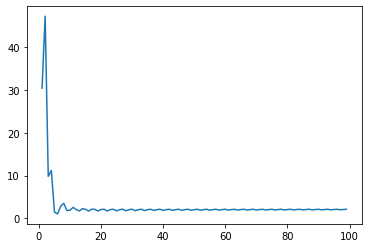

In [60]:
bin = 1000
x = np.arange(0,100)
y= np.zeros(x.size)

for i in x:
    y[i] = abs((bin/100) - simp_38(f,0,10,i))
plt.plot(x,y)

#**Reference**
[1] “Integration (scipy.integrate) — SciPy v1.6.2 Reference Guide,” docs.scipy.org. https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html.
‌